<a href="https://colab.research.google.com/github/Aleksandra0/Genetic-Programming-for-Convolutional-Neural-Network-Architecture/blob/main/PGwJP_Projekt_Zaliczeniowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
import random
from deap import tools, base, creator, gp, algorithms
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pygraphviz as pgv
import time

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


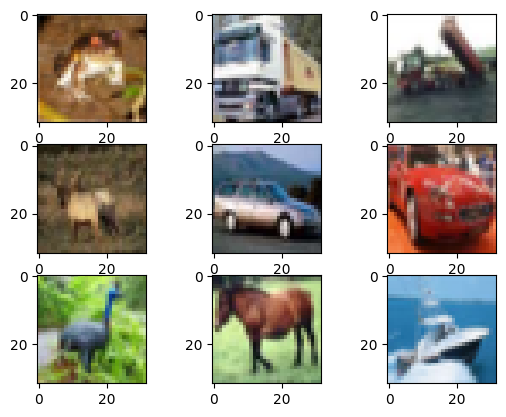

[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]


In [ ]:
#CIFAR dataset

cifar10 = keras.datasets.cifar10

(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = cifar10.load_data()
print(train_images_cifar.shape, train_labels_cifar.shape)
print(test_images_cifar.shape, test_labels_cifar.shape)

#Normalizing data - pixel normalized to be between 0 and 1
train_images_cifar, test_images_cifar = train_images_cifar / 255.0, test_images_cifar / 255.0

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images_cifar[i], cmap='gray')
plt.show()

for i in range (9):
  print(train_labels_cifar[i])

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
!pip install emnist

(124800, 28, 28, 1) (124800,)
(20800, 28, 28, 1) (20800,)


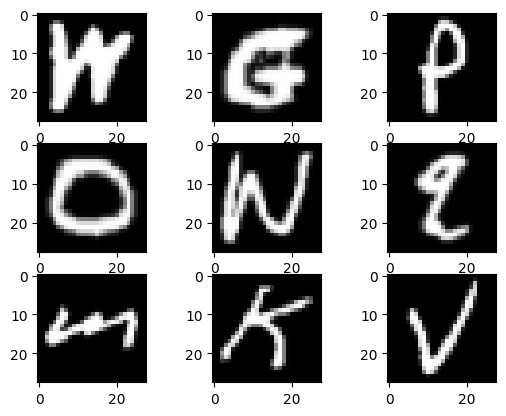

23
7
16
15
23
17
13
11
22


In [ ]:
#emnist dataset

import emnist

(etrain_images, etrain_labels), (etest_images, etest_labels) = emnist.extract_training_samples('letters'), emnist.extract_test_samples('letters')

etrain_images = etrain_images.reshape(-1, 28, 28, 1)
etest_images = etest_images.reshape(-1, 28, 28, 1)

print(etrain_images.shape, etrain_labels.shape)
print(etest_images.shape, etest_labels.shape)

#Normalizing data - pixel normalized to be between 0 and 1
etrain_images, etest_images = etrain_images / 255.0, etest_images / 255.0

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(etrain_images[i], cmap='gray')
plt.show()

for i in range (9):
  print(etrain_labels[i])

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


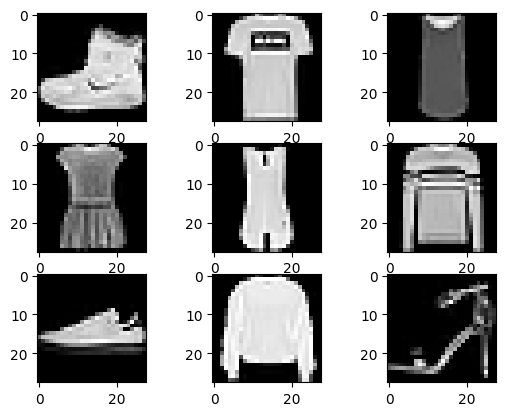

9
0
0
3
0
2
7
2
5


In [ ]:
#fmnist dataset

fmnist = keras.datasets.fashion_mnist

(train_images_fmnist, train_labels_fmnist), (test_images_fmnist, test_labels_fmnist) = fmnist.load_data()

train_images_fmnist = train_images_fmnist.reshape(-1, 28, 28, 1)
test_images_fmnist = test_images_fmnist.reshape(-1, 28, 28, 1)

print(train_images_fmnist.shape, train_labels_fmnist.shape)
print(test_images_fmnist.shape, test_labels_fmnist.shape)

#Normalizing data - pixel normalized to be between 0 and 1
train_images_fmnist, test_images_fmnist = train_images_fmnist / 255.0, test_images_fmnist / 255.0

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images_fmnist[i], cmap='gray')
plt.show()

for i in range (9):
  print(train_labels_fmnist[i])

In [ ]:
#Making a Train Set and Test Set Smaller (100 images per class in train set, 30 images per class in test set)

#Completely random draw
#train_images_sample = np.random.choice(len(train_images_cifar), size=500, replace=False)
#train_images_cifar_s = train_images_cifar[train_images_sample]
#train_labels_cifar_s = train_labels_cifar[train_images_sample]

#test_images_sample = np.random.choice(len(test_images_cifar), size=500, replace=False)
#test_images_cifar_s = test_images_cifar[test_images_sample]
#test_labels_cifar_s = test_labels_cifar[test_images_sample]

#Random draw with equal representation of every label
def make_set_smaller(train_images, train_labels, test_images, test_labels, output):
  train_labels_np = np.array(train_labels)
  sampled_indices = []
  samples_per_label = 100
  for label in range(output):
      label_indices = np.where(train_labels_np == label)[0]
      sampled_indices.extend(np.random.choice(label_indices, size=samples_per_label, replace=False))
  train_images_s = train_images[sampled_indices]
  train_labels_s = train_labels[sampled_indices]

  test_labels_np = np.array(test_labels)
  sampled_indices = []
  samples_per_label = 30
  for label in range(output):
      label_indices = np.where(test_labels_np == label)[0]
      sampled_indices.extend(np.random.choice(label_indices, size=samples_per_label, replace=False))

  test_images_s = test_images[sampled_indices]
  test_labels_s = test_labels[sampled_indices]

  return train_images_s, train_labels_s, test_images_s, test_labels_s

train_images_cifar_s, train_labels_cifar_s, test_images_cifar_s, test_labels_cifar_s = make_set_smaller(train_images_cifar, train_labels_cifar, test_images_cifar, test_labels_cifar, 10)
#train_images_emnist_s, train_labels_emnist_s, test_images_emnist_s, test_labels_emnist_s = make_set_smaller(etrain_images, etrain_labels, etest_images, etest_labels, 27)
train_images_fmnist_s, train_labels_fmnist_s, test_images_fmnist_s, test_labels_fmnist_s = make_set_smaller(train_images_fmnist, train_labels_fmnist, test_images_fmnist, test_labels_fmnist, 10)

#Random draw for for emnist dataset
unique_labels = np.unique(etrain_labels)
samples_per_label = 100
train_images_emnist_s = []
train_labels_emnist_s = []
test_images_emnist_s = []
test_labels_emnist_s = []

for label in unique_labels:
  label_indices = np.where(etrain_labels == label)[0]
  random.shuffle(label_indices)
  sampled_indices = label_indices[:samples_per_label]
  train_images_emnist_s.extend(etrain_images[sampled_indices])
  train_labels_emnist_s.extend(etrain_labels[sampled_indices])
train_images_emnist_s = np.array(train_images_emnist_s)
train_labels_emnist_s = np.array(train_labels_emnist_s)

samples_per_label = 30
for label in unique_labels:
  label_indices = np.where(etest_labels == label)[0]
  random.shuffle(label_indices)
  sampled_indices = label_indices[:samples_per_label]
  test_images_emnist_s.extend(etest_images[sampled_indices])
  test_labels_emnist_s.extend(etest_labels[sampled_indices])
test_images_emnist_s = np.array(test_images_emnist_s)
test_labels_emnist_s = np.array(test_labels_emnist_s)


In [ ]:
VERBOSE=0

class ObjectForTree:
  def __init__(self, model, x, y, promotion, size_of_picture, shape):
    self.model = model
    self.x = x
    self.y = y
    self.promotion = promotion
    self.size_of_picture = size_of_picture
    self.shape = shape

def sigmoid(ObjectForTree1, ObjectForTree2):
  if(ObjectForTree1.promotion > ObjectForTree2.promotion):
    y = 1 / (1 + np.exp(-ObjectForTree1.x))
    ObjectForTree1.x = y
    ObjectForTree1.promotion -= 1
    return ObjectForTree1
  else:
    y = 1 / (1 + np.exp(-ObjectForTree2.x))
    ObjectForTree2.x = y
    ObjectForTree2.promotion -= 1
    return ObjectForTree2


def tanh(ObjectForTree1, ObjectForTree2):
    if(ObjectForTree1.promotion > ObjectForTree2.promotion):
      z = np.tanh(ObjectForTree1.y)
      ObjectForTree1.y = z
      ObjectForTree1.promotion -= 1
      return ObjectForTree1
    else:
      z = np.tanh(ObjectForTree2.y)
      ObjectForTree2.y = z
      ObjectForTree2.promotion -= 1
      return ObjectForTree2


def add_pool_layer(ObjectForTree1, ObjectForTree2):
  if(ObjectForTree1.promotion > ObjectForTree2.promotion):
    if(ObjectForTree1.y >= 0):
      ObjectForTree1.model.add(layers.MaxPool2D((2,2)))  #2D Pooling layer, pooling size =  (2,2)
    else:
      ObjectForTree1.model.add(layers.MaxPool2D((3,3)))  #2D Pooling layer, pooling size =  (3,3)
    ObjectForTree1.promotion += 1.01
    return ObjectForTree1
  else:
    if(ObjectForTree2.y >= 0):
      ObjectForTree2.model.add(layers.MaxPool2D((2,2)))  #2D Pooling layer, pooling size =  (2,2)
    else:
      ObjectForTree2.model.add(layers.MaxPool2D((3,3)))  #2D Pooling layer, pooling size =  (3,3)
    ObjectForTree2.promotion += 1.01
    return ObjectForTree2

def add_conv_layer(ObjectForTree1, ObjectForTree2):
  if(ObjectForTree1.promotion > ObjectForTree2.promotion):
    if(ObjectForTree1.x <= 0.25):
      ObjectForTree1.model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='selu', input_shape=(ObjectForTree1.size_of_picture,ObjectForTree1.size_of_picture,ObjectForTree1.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - selu, input shape
    elif(ObjectForTree1.x > 0.25 and ObjectForTree1.x <= 0.5):
      ObjectForTree1.model.add(layers.Conv2D(32, (2,2), strides=(1,1), padding='valid', activation='selu', input_shape=(ObjectForTree1.size_of_picture,ObjectForTree1.size_of_picture,ObjectForTree1.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - selu, input shape
    elif(ObjectForTree1.x > 0.5 and ObjectForTree1.x <= 0.75):
      ObjectForTree1.model.add(layers.Conv2D(32, (2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(ObjectForTree1.size_of_picture,ObjectForTree1.size_of_picture,ObjectForTree1.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - relu, input shape
    else:
      ObjectForTree1.model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(ObjectForTree1.size_of_picture,ObjectForTree1.size_of_picture,ObjectForTree1.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - relu, input shape
    return ObjectForTree1
  else:
    if(ObjectForTree2.x <= 0.25):
      ObjectForTree2.model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='selu', input_shape=(ObjectForTree2.size_of_picture,ObjectForTree2.size_of_picture,ObjectForTree2.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - selu, input shape
    elif(ObjectForTree2.x > 0.25 and ObjectForTree2.x <= 0.5):
      ObjectForTree2.model.add(layers.Conv2D(32, (2,2), strides=(1,1), padding='valid', activation='selu', input_shape=(ObjectForTree2.size_of_picture,ObjectForTree2.size_of_picture,ObjectForTree2.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - selu, input shape
    elif(ObjectForTree2.x > 0.5 and ObjectForTree2.x <= 0.75):
      ObjectForTree2.model.add(layers.Conv2D(32, (2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(ObjectForTree2.size_of_picture,ObjectForTree2.size_of_picture,ObjectForTree2.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - relu, input shape
    else:
      ObjectForTree2.model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(ObjectForTree2.size_of_picture,ObjectForTree2.size_of_picture,ObjectForTree2.shape))) #2D Convolutional Layer, with filter set to 32, and kernel size (3,3) (Grid used for feature extraction), strides(1,1) - how far to slide it over the image, padding - "valid"/"same", activation function - relu, input shape
    return ObjectForTree2


#Creating set of primitives for tree creation - using strongly typed gp (The character of the tree is defined but finally it can vary due to the crossing and mutation)
pset = gp.PrimitiveSetTyped("main", [object, object], object) #Function takes 2 arguments and returns one
pset.addPrimitive(sigmoid, [object, object], object) #Sigmoid function takes two arguments:  takes two arguments: two object of type ObjectForTree and returns one object form type ObjectForTree
pset.addPrimitive(add_conv_layer,  [object, object], object) #Function add_layer_conv_and_pool takes two arguments:  takes two arguments: two object of type ObjectForTree and returns one object form type ObjectForTree
pset.addPrimitive(add_pool_layer, [object, object], object) #Function add_layer_conv_and_pool takes two arguments: two object of type ObjectForTree and returns one object form type ObjectForTree
pset.addPrimitive(tanh, [object, object], object) #Tangens function
pset.renameArguments(ARG0='OFT1')
pset.renameArguments(ARG1='OFT2')

#creator.create("FitnessMaxMin", base.Fitness, weights=(1.0, -1.0)) #Problem maksymalizacji i minimalizacji - Maksymalizujemy Accuracy dopasowania modelu, minimalizujemy czas trenowania modelu
creator.create("FitnessMaxMin", base.Fitness, weights=(1.0, ))                #Problem maksymalizacji - Maksymalizujemy Accuracy dopasowania modelu
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMaxMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3) #Registering of expression, min size of tree and max size of tree is defined here
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr) #Registration of individual in toolbox, initIterate - generate elements based on the Primitive Set for Individual
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #Registering a population
toolbox.register("compile", gp.compile, pset=pset) #Compilation of tree

# Example of creating an individual
individual_form = creator.Individual(gp.PrimitiveTree.from_string("add_pool_layer(add_conv_layer(sigmoid(OFT1, OFT2), tanh(OFT1, OFT2)), OFT1)", pset))

#expr = toolbox.individual()
nodes, edges, labels = gp.graph(individual_form)

# Tree plotting using graphviz
g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

#Evaluation function - used to evaluate individuals in population
def evaluate_model(individual, x, y, promotion, size_of_picture, shape, output, train_images, train_labels, test_images, test_labels):
  model = keras.models.Sequential() #using Sequential API
  objtree1 = ObjectForTree(model, x, y, promotion, size_of_picture, shape)
  objtree2 = ObjectForTree(model, x, y, promotion, size_of_picture, shape)
  compiled_function = gp.compile(individual, pset)
  compiled_function(objtree1, objtree2)
  model.add(keras.layers.Flatten()) #Flatten to 1 dimension
  model.add(keras.layers.Dense(64, activation="relu")) #First fully connected layer with 64 as output and relu activation function
  model.add(keras.layers.Dense(output)) #Last Layer, we have 10 classes
  #loss and optimizer
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Sparse because our output is like y=0 or y=1 ..., from_logits=True
  optimizer = keras.optimizers.Adam(learning_rate=0.001) #Learning Rate = 0.001
  metrics=["accuracy"]
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  #training
  batch_size = 64
  epochs = 5
  start_time = time.time()
  model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=VERBOSE) #verbose = 2 - normla loggin, verbose = 1 - progress bar
  end_time = time.time()
  training_time = end_time - start_time
  loss, accuracy = model.evaluate(test_images, test_labels, verbose=VERBOSE)
  return accuracy,


In [ ]:
#Registering toolbox for CIFAR dataset
rx = random.uniform(-5, 5)
ry = random.uniform(-5, 5)
toolbox.register("evaluate", evaluate_model, x=rx, y=ry, promotion=0, size_of_picture=32, shape=3, output=10, train_images=train_images_cifar_s, train_labels=train_labels_cifar_s, test_images=test_images_cifar_s, test_labels=test_labels_cifar_s) #Registration of function, name + additional aprameters - value of x, mean and standrad deviation for gaussian function, set of training images, set of training labels
toolbox.register("select", tools.selTournament, tournsize=3) #Tournament selection
toolbox.register("mate", gp.cxOnePoint) #Registaring a crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) #Registering a mutation
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [ ]:
#Registering toolbox for EMNIST dataset
rx = random.uniform(-5, 5)
ry = random.uniform(-5, 5)
toolbox.register("evaluate", evaluate_model, x=rx, y=ry, promotion=0, size_of_picture=28, shape=1, output=27, train_images=train_images_emnist_s, train_labels=train_labels_emnist_s, test_images=test_images_emnist_s, test_labels=test_labels_emnist_s) #Registration of function, name + additional aprameters - value of x, mean and standrad deviation for gaussian function, set of training images, set of training labels
toolbox.register("select", tools.selTournament, tournsize=3) #Tournament selection
toolbox.register("mate", gp.cxOnePoint) #Registaring a crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) #Registering a mutation
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [ ]:
#Registering toolbox for FMNIST dataset
rx = random.uniform(-5, 5)
ry = random.uniform(-5, 5)
toolbox.register("evaluate", evaluate_model, x=rx, y=ry, promotion=0, size_of_picture=28, shape=1, output=10, train_images=train_images_fmnist_s, train_labels=train_labels_fmnist_s, test_images=test_images_fmnist_s, test_labels=test_labels_fmnist_s) #Registration of function, name + additional aprameters - value of x, mean and standrad deviation for gaussian function, set of training images, set of training labels
toolbox.register("select", tools.selTournament, tournsize=3) #Tournament selection
toolbox.register("mate", gp.cxOnePoint) #Registaring a crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) #Registering a mutation
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [ ]:
def main():

  random.seed(402974)

  population_size = 20
  number_of_generations = 5
  cross_prob = 0.9 #Probability of crossing
  mutation_prob = 0.2 #Probability of mutation

  pop = toolbox.population(n=population_size)
  hof = tools.HallOfFame(1)

  stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
  stats_size = tools.Statistics(len)
  mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
  mstats.register("avg", np.mean)
  mstats.register("std", np.std)
  mstats.register("min", np.min)
  mstats.register("max", np.max)

  pop, log = algorithms.eaSimple(pop, toolbox, cross_prob, mutation_prob, number_of_generations, stats=mstats, halloffame=hof, verbose=True) #Probability of crossing, probability of mutation, number of generations

  best_solution = hof[0]
  best_function = toolbox.compile(expr=best_solution)

  print("best function: ", best_solution)

  individual_form = creator.Individual(gp.PrimitiveTree.from_string(str(best_solution), pset))
  nodes, edges, labels = gp.graph(individual_form)
  # Tree plotting using graphviz
  g = pgv.AGraph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  g.layout(prog="dot")
  for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]
  g.draw("best_tree.pdf")

if __name__ == "__main__":
    main()

   	      	                        fitness                         	                      size                     
   	      	--------------------------------------------------------	-----------------------------------------------
gen	nevals	avg   	gen	max 	min     	nevals	std     	avg	gen	max	min	nevals	std    
0  	20    	0.7215	0  	0.82	0.366667	20    	0.111023	6.8	0  	15 	3  	20    	3.89358
1  	19    	0.777 	1  	0.82	0.606667	19    	0.0437404	7  	1  	19 	1  	19    	4.51664
2  	20    	0.7805	2  	0.836667	0.583333	20    	0.057949 	8  	2  	21 	1  	20    	6.08276
3  	20    	0.792833	3  	0.84    	0.67    	20    	0.0326815	6.8	3  	19 	3  	20    	4.28486
4  	19    	0.794833	4  	0.836667	0.603333	19    	0.0484708	5.6	4  	19 	1  	19    	5.02394
5  	16    	0.8075  	5  	0.836667	0.77    	16    	0.024011 	4.1	5  	11 	1  	16    	2.32164
best function:  add_conv_layer(OFT2, OFT2)
